## 0. Import Library

In [244]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1. Data

**Boston Housing Regression Analysis**

Columns:
```
CRIM: Per capita crime rate by town # 범죄율
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft # 주거공간 비율
INDUS: Proportion of non-retail business acres per town # 무점포 비율
CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise) # 강가 유무
NOX: Nitric oxide concentration (parts per 10 million) # 산화 질소 농도
RM: Average number of rooms per dwelling # 가구별 평균 방 수
AGE: Proportion of owner-occupied units built prior to 1940 # 1940년 이전 건축된 개인 소유 유닛 비율
DIS: Weighted distances to five Boston employment centers # 5개 보스턴 고용 센터까지의 가중치된 거리
RAD: Index of accessibility to radial highways # 고속도로 접근성
PTRATIO: Pupil-teacher ratio by town # 학생-선생님 비율
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town # 아프리칸 아메리칸 지수
LSTAT: Percentage of lower status of the population # 노동자, 고등교육 x 비율
MEDV: Median value of owner-occupied homes in $1000s # target 
```

In [ ]:
drive.mount('/content/drive')
PATH='/content/drive/MyDrive/kubig_ML/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv(PATH+'HousingData.csv')

## 2. Data Preprocessing

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.1. 결측치 제거

In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

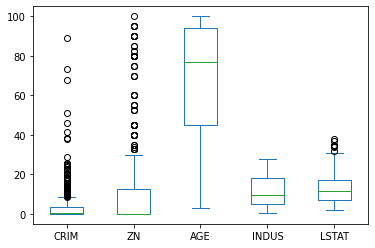

In [ ]:
data[['CRIM','ZN','AGE','INDUS','LSTAT']].plot.box() # dummy variable인 'CHAS'는 제외

In [387]:
# preprocessed_data
preprocessed_data=data.copy() # 전처리하기 위해 data 복사
preprocessed_data['CRIM']=preprocessed_data['CRIM'].fillna(preprocessed_data['CRIM'].median())
preprocessed_data['ZN']=preprocessed_data['ZN'].fillna(preprocessed_data['ZN'].median())
preprocessed_data['AGE']=preprocessed_data['AGE'].fillna(preprocessed_data['AGE'].mean())
preprocessed_data['INDUS']=preprocessed_data['INDUS'].fillna(preprocessed_data['INDUS'].mean())
preprocessed_data['LSTAT']=preprocessed_data['LSTAT'].fillna(preprocessed_data['LSTAT'].mean())

In [388]:
preprocessed_data=preprocessed_data.dropna() # 'CHAS' 결측치는 drop

### 2.2. feature 간 관계

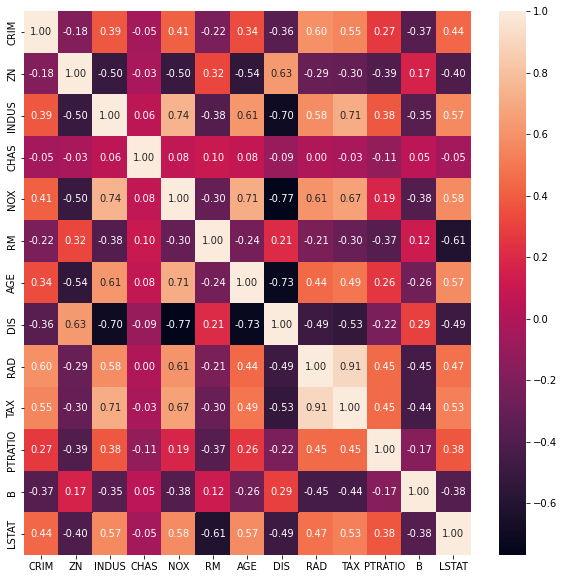

In [365]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap((preprocessed_data.drop(columns='MEDV')).corr(),annot=True,fmt=".2f")
plt.show()

In [325]:
#preprocessed_data=preprocessed_data.drop(columns=['TAX','DIS']) # 'TAX', 'DIS' feature drop

### 2.3. 정규화

In [389]:
X_cat=preprocessed_data['CHAS']
X_num=preprocessed_data.drop(columns=['CHAS','MEDV'],axis=1)

In [398]:
scaler=StandardScaler()


scaler.fit(X_num)
X_scaled=scaler.transform(X_num)
X_num=pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

In [390]:
X_num.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,3.430804,10.888889,10.989827,0.553699,6.296835,68.360639,3.788976,9.395062,405.485597,18.453086,356.887202,12.670788
std,8.658364,23.184046,6.734251,0.115390,0.699175,27.504876,2.096304,8.626756,167.604833,2.169560,90.959820,7.070787
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.082268,0.000000,5.190000,0.449000,5.887250,45.725000,2.104425,4.000000,277.500000,17.400000,375.607500,7.182500
50%,0.253715,0.000000,9.795000,0.538000,6.209000,74.350000,3.207450,5.000000,330.000000,19.000000,391.575000,11.730000
75%,2.588992,0.000000,18.100000,0.624000,6.628000,93.600000,5.117675,24.000000,666.000000,20.200000,396.295000,16.500000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 3. Train

In [399]:
# target data
X_data=pd.concat([X_num,X_cat],axis=1)
y_data=preprocessed_data['MEDV']

In [400]:
# train-test split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,train_size=0.8,random_state=10)

In [413]:
# cv, model
#cv=KFold(n_splits=5,shuffle=True,random_state=10)
model_lr=LinearRegression() # linear regression
model_ridge=Ridge() # ridge
model_lasso=Lasso(alpha=0.01) # lasso

In [414]:
model_lr.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

## 4. Test

In [403]:
y_pred=model_lr.predict(X_test)
print('r2 score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.7205341796427391
rmse: 5.191952883902874


In [404]:
y_pred=model_ridge.predict(X_test)
print('r2 score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.7192490417073241
rmse: 5.203876922364423


In [415]:
y_pred=model_lasso.predict(X_test)
print('r2 score:',r2_score(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.7236183648738048
rmse: 5.163224201478308


In [416]:
#np.mean(cross_val_score(model_lasso,X_data,y_data,cv=cv)) # r2 score